In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df=pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [11]:
for col in df.columns:
    nb_uniques = df[col].nunique()
    if nb_uniques < 10:
        print(f"{col} a seulement {nb_uniques} valeurs uniques : {df[col].unique()}")

blue a seulement 2 valeurs uniques : [0 1]
dual_sim a seulement 2 valeurs uniques : [0 1]
four_g a seulement 2 valeurs uniques : [0 1]
n_cores a seulement 8 valeurs uniques : [2 3 5 6 1 8 4 7]
three_g a seulement 2 valeurs uniques : [0 1]
touch_screen a seulement 2 valeurs uniques : [0 1]
wifi a seulement 2 valeurs uniques : [1 0]
price_range a seulement 4 valeurs uniques : [1 2 3 0]


In [12]:
df_encoded = pd.get_dummies(df, columns=['n_cores', 'price_range'], drop_first=True)

In [15]:
# Calcul des statistiques
mean_val = np.mean(df['battery_power'])
median_val = np.median(df['battery_power'])
mode_val = stats.mode(df['battery_power'], keepdims=True).mode[0]

print("Mean (moyenne) :", mean_val)
print("Median (médiane) :", median_val)
print("Mode (mode) :", mode_val)

Mean (moyenne) : 1238.5185
Median (médiane) : 1226.0
Mode (mode) : 618


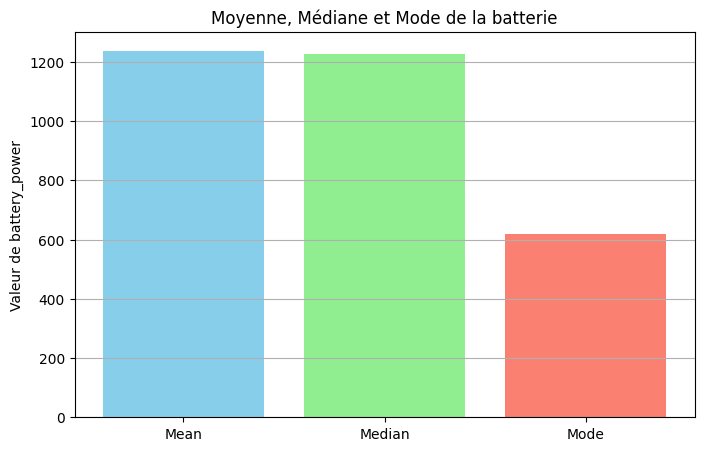

In [16]:
# 🔹 Visualisation 1 : barres des 3 mesures
plt.figure(figsize=(8, 5))
plt.bar(['Mean', 'Median', 'Mode'], [mean_val, median_val, mode_val], color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Moyenne, Médiane et Mode de la batterie")
plt.ylabel("Valeur de battery_power")
plt.grid(True, axis='y')
plt.show()

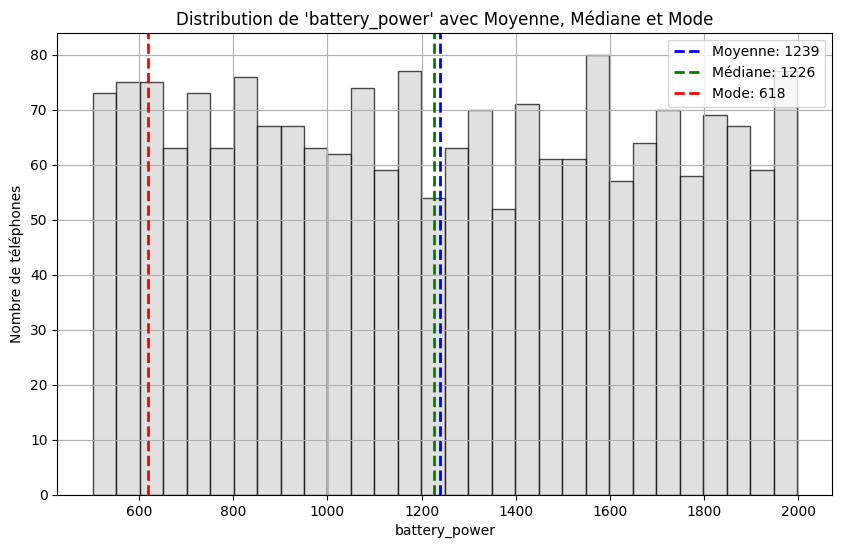

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['battery_power'], bins=30, color='lightgray', edgecolor='black', alpha=0.7)
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.0f}')
plt.axvline(mode_val, color='red', linestyle='--', linewidth=2, label=f'Mode: {mode_val}')
plt.title("Distribution de 'battery_power' avec Moyenne, Médiane et Mode")
plt.xlabel("battery_power")
plt.ylabel("Nombre de téléphones")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Variance, écart-type, étendue
print("Variance:", np.var(df['battery_power']))
print("Standard Deviation:", np.std(df['battery_power']))
print("Range:", np.max(df['battery_power']) - np.min(df['battery_power']))


Variance: 192991.81565775
Standard Deviation: 439.3083377967575
Range: 1497


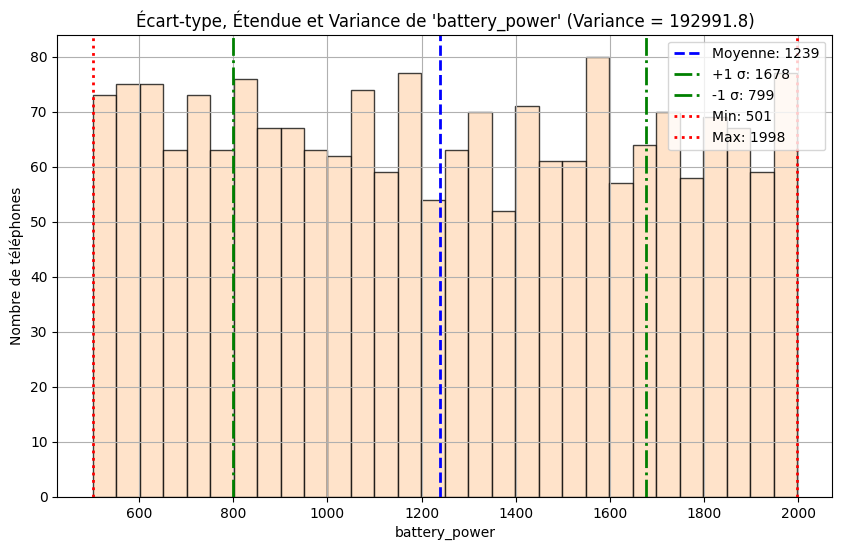

In [ ]:
# 📊 Histogramme avec lignes pour min, max, ± écart-type

df = pd.read_csv("train.csv")
data = df['battery_power']
var_val = np.var(data)
mean_val = np.mean(data)
std_val = np.std(data)
min_val = np.min(data)
max_val = np.max(data)
range_val = max_val - min_val
var_val = np.var(data)

# 📊 Histogramme avec lignes pour min, max, ± écart-type
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, color='peachpuff', edgecolor='black', alpha=0.75)

# Lignes verticales
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.0f}')
plt.axvline(mean_val + std_val, color='green', linestyle='-.', linewidth=2, label=f'+1 σ: {mean_val + std_val:.0f}')
plt.axvline(mean_val - std_val, color='green', linestyle='-.', linewidth=2, label=f'-1 σ: {mean_val - std_val:.0f}')
plt.axvline(min_val, color='red', linestyle=':', linewidth=2, label=f'Min: {min_val}')
plt.axvline(max_val, color='red', linestyle=':', linewidth=2, label=f'Max: {max_val}')

# Titre et légende
plt.title(f"Écart-type, Étendue et Variance de 'battery_power' (Variance = {var_val:.1f})")
plt.xlabel("battery_power")
plt.ylabel("Nombre de téléphones")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Skewness et Kurtosis
print("Skewness:", stats.skew(df['battery_power']))
print("Kurtosis:", stats.kurtosis(df['battery_power']))

Skewness: 0.03187454295305568
Kurtosis: -1.224084165725428


In [34]:
# Tester si la RAM varie selon les classes de prix
grouped = [df[df['price_range'] == i]['ram'] for i in range(4)]
f_val, p_val = stats.f_oneway(*grouped)
print(f"ANOVA RAM vs Price Range: F={f_val}, p={p_val}")

ANOVA RAM vs Price Range: F=3520.110823895761, p=0.0


In [35]:
correlation = df.corr()
print(correlation['price_range'].sort_values(ascending=False))

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


plus la ram est grande plus le prix est élevé
plus c'est près de zero, moins il y a de l'influence sur le prix

Conclusion, la ram et la batterie sont les deux éléments qui influencent le plus le prix.

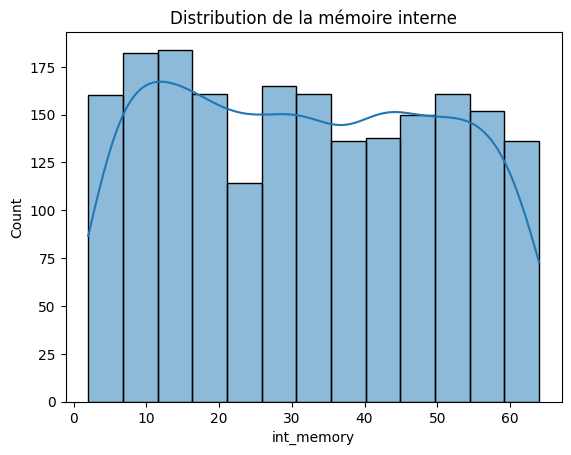

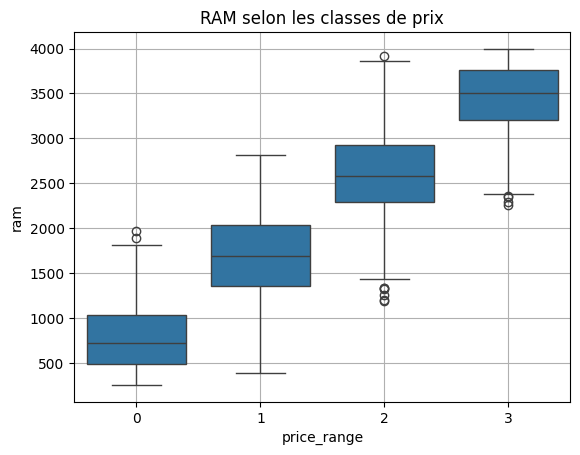

In [37]:
# Histogramme de la mémoire interne
sns.histplot(df['int_memory'], kde=True)
plt.title("Distribution de la mémoire interne")
plt.show()

# Boxplot : RAM selon les classes de prix
sns.boxplot(x='price_range', y='ram', data=df)
plt.title("RAM selon les classes de prix")
plt.grid(True)
plt.show()

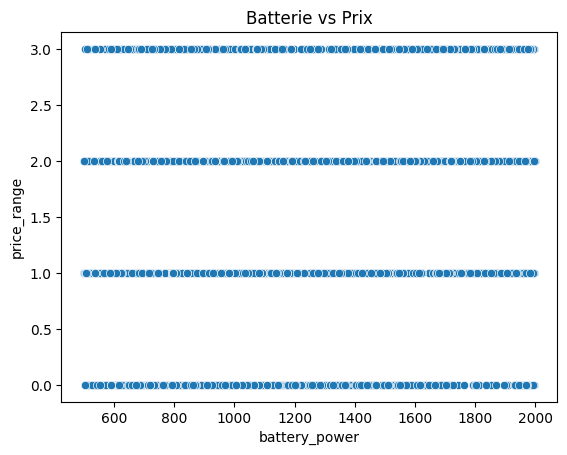

In [38]:
# Scatter plot
sns.scatterplot(x='battery_power', y='price_range', data=df)
plt.title("Batterie vs Prix")
plt.show()

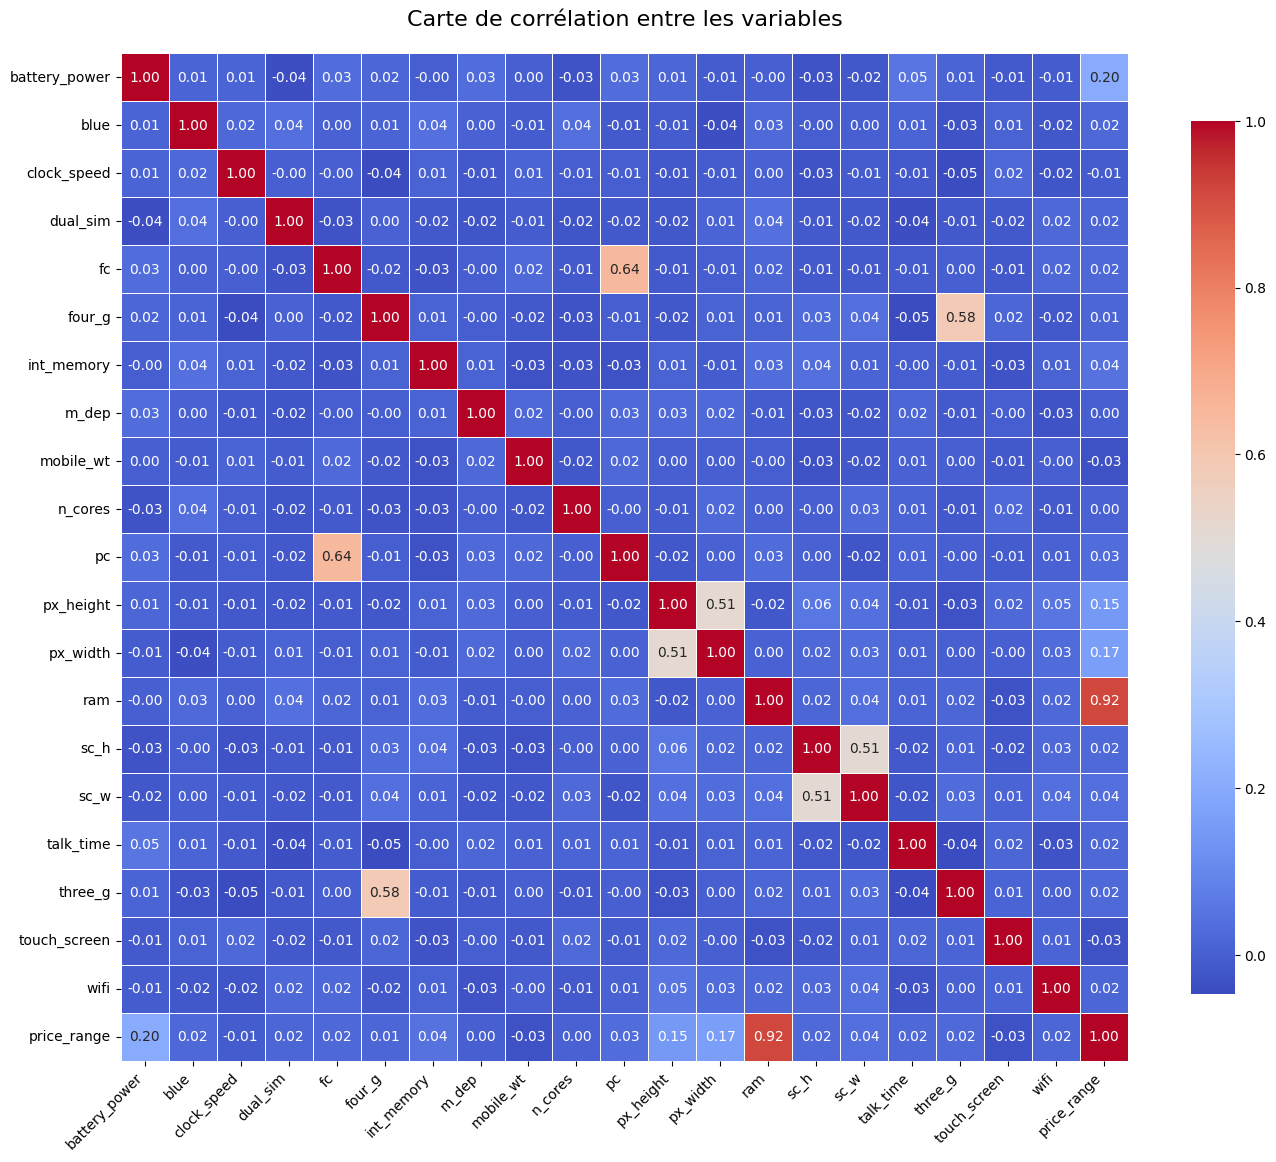

In [41]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Taille de la figure adaptée
plt.figure(figsize=(14, 12))
# Heatmap lisible et claire
sns.heatmap(corr_matrix, 
            annot=True,       # Affiche les valeurs numériques
            fmt=".2f",        # Deux chiffres après la virgule
            cmap="coolwarm",  # Palette de couleurs
            square=True,      # Carrés parfaits
            linewidths=0.5,   # Ligne entre les cases
            cbar_kws={"shrink": 0.8})  # Réduit la taille de la barre de couleurs

# Rotation des noms de colonnes pour éviter qu’ils se chevauchent
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Titre
plt.title("Carte de corrélation entre les variables", fontsize=16, pad=20)

plt.tight_layout()  # Ajuste automatiquement les marges
plt.show()

histplot() → voir la forme de la distribution

boxplot() → identifier les médianes et outliers

scatterplot() → visualiser des relations possibles

heatmap() → vue synthétique des relations entre toutes les colonnes

Les variables les plus corrélés avec le prix sont : la RAM et la batterie

la mémoire interne varie entre 100 et 150 Go

La Ram influence le prix dans les 4 categories de prix